In [1]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.1'

# Read in Boston Graph

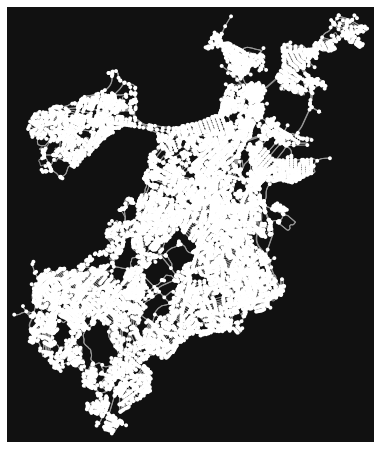

In [3]:
# get street graph for Boston city
G = ox.graph_from_place('Boston, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

# OD matrix of Boston

In [2]:
# read the od matrix
Boston_OD=pd.read_csv(r'D:\Berkeley\CE263N\Project idea\4weixin\BostonMatrix.txt', delimiter=' ')
Boston_OD.head()

id_25005600100  id_25005600202  id_25005600203  id_25005600204  \
id_osm_1                   0               0               0               0   
id_osm_10                  0               0               0               0   
id_osm_100                 0               0               0               0   
id_osm_1000                0               0               0               0   
id_osm_10000               0               0               0               0   

              id_25005610100  id_25005610202  id_25005610203  id_25005610204  \
id_osm_1                   0               0               0               0   
id_osm_10                  0               0               0               0   
id_osm_100                 0               0               0               0   
id_osm_1000                0               0               0               0   
id_osm_10000               0               0               0               0   

              id_25005611101  id_25005611102  ...  id_25027747101  \
id_osm_1                   0               0  ...               0   
id_osm_10                  0               0  ...               0   
id_osm_100                 0               0  ...               0   
id_osm_1000                0               0  ...               0   
id_osm_10000               0               0  ...               0   

              id_25027747102  id_25027748100  id_25027749100  id_25027749200  \
id_osm_1                   0               0               0               0   
id_osm_10                  0               0               0               0   
id_osm_100                 0               0               0               0   
id_osm_1000                0               0               0               0   
id_osm_10000               0               0               0               0   

              id_25027750100  id_25027750200  id_25027750300  id_25027761200  \
id_osm_1                   0               0               0               0   
id_osm_10                  0               0               0               0   
id_osm_100                 0               0               0               0   
id_osm_1000                0               0               0               0   
id_osm_10000               0               0               0               0   

              id_25027761400  
id_osm_1                   0  
id_osm_10                  0  
id_osm_100                 0  
id_osm_1000                0  
id_osm_10000               0  

[5 rows x 956 columns]

# Boston Geodata

In [5]:
# Boston city boundary
Boston=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\City_of_Boston_Boundary-shp\City_of_Boston_Boundary.shp')
Boston=Boston.to_crs('EPSG:4326')

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


<AxesSubplot:>

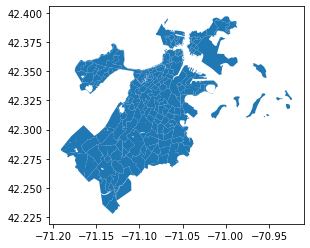

In [7]:
# Boston census tracts
Boston_tracts=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston_tracts_wTGPopAndOtherPopOAP_racial.geojson')
Boston_tracts=gpd.clip(Boston_tracts,Boston,keep_geom_type=True)
Boston_tracts=Boston_tracts[['GEOID10', 'neighbour', 'geometry']]
Boston_tracts['tract_centroid']=Boston_tracts['geometry'].centroid
Boston_tracts.plot()

D:\anaconda3\lib\site-packages\geopandas\tools\clip.py:194: UserWarning: keep_geom_type can not be called on a GeoDataFrame with GeometryCollection.
  "keep_geom_type can not be called on a "
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:>

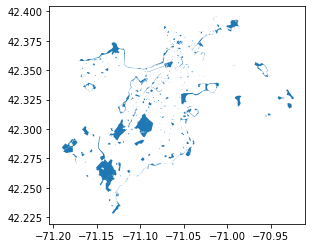

In [8]:
# Parks profile from osm
Boston_parks=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston_fulldata_update_remerged.geojson')
Boston_parks=Boston_parks.to_crs('EPSG:4326')
Boston_parks=Boston_parks[['new_id','geometry']]
Boston_parks=gpd.clip(Boston_parks,Boston,keep_geom_type=True) ## clip to boston city area
Boston_parks['park_centroid']=Boston_parks['geometry'].centroid
Boston_parks.plot()

In [9]:
## crop OD Matrix to Boston city area

In [10]:
park_id = [i.split('id_')[-1] for i in np.array(Boston_OD.index)]

In [11]:
tract_id = [i.split('id_')[-1] for i in np.array(Boston_OD.columns)]

In [12]:
Boston_OD.index=park_id
Boston_OD.columns=tract_id

In [13]:
Boston_OD=Boston_OD[Boston_OD.index.isin(Boston_parks.new_id)]

In [14]:
Boston_OD=Boston_OD[Boston_OD.columns[Boston_OD.columns.isin(Boston_tracts.GEOID10.values)]]

In [15]:
Boston_OD.shape

(503, 197)

In [16]:
Boston_OD

25017342400  25017350103  25017350104  25017351403  25017351404  \
osm_10006            3            1            0            1            0   
osm_10081            4            1            0            1            0   
osm_10086            0            0            0            0            0   
osm_10163            1            0            0            0            0   
osm_10164            0            0            0            0            0   
...                ...          ...          ...          ...          ...   
osm_9781             5            0            7            2            1   
osm_9844             0            0            0            0            0   
osm_9851             5            0            5            4            0   
osm_9883             1            0            5            2            0   
osm_9968             0            0            0            2            0   

           25017351500  25017373100  25017373500  25017373600  25021400100  \
osm_10006            2            1            1            3            6   
osm_10081            0            0            0            1            0   
osm_10086            0            0            0            0            0   
osm_10163            0            1            0            0            0   
osm_10164            0            1            0            0            0   
...                ...          ...          ...          ...          ...   
osm_9781             0            9            0            9            2   
osm_9844             0            0            0            0            0   
osm_9851             3            7           11           10           13   
osm_9883             1            6            4           24           40   
osm_9968             0            0            0            0            1   

           ...  25025140201  25025140202  25025140300  25025140400  \
osm_10006  ...            3            8            3           11   
osm_10081  ...            0            0            0            1   
osm_10086  ...            0            0            0            0   
osm_10163  ...            1            1            6            3   
osm_10164  ...            1            1            5            2   
...        ...          ...          ...          ...          ...   
osm_9781   ...            0            1            7            3   
osm_9844   ...            0            0            2            1   
osm_9851   ...            4            4           16           12   
osm_9883   ...            2            2            4           10   
osm_9968   ...            0            0            0            0   

           25025180500  25025980101  25025980300  25025981100  25025981300  \
osm_10006            0            1            1            0            0   
osm_10081            1            0            0            0            1   
osm_10086            0            0            0            0            0   
osm_10163            0            0            0            0            0   
osm_10164            0            0            0            0            0   
...                ...          ...          ...          ...          ...   
osm_9781             0            0            0            0            0   
osm_9844             0            0            0            0            0   
osm_9851             7            0            1            0            0   
osm_9883             0            1            0            0            1   
osm_9968             0            0            0            0            0   

           25025981502  
osm_10006            0  
osm_10081            0  
osm_10086            0  
osm_10163            0  
osm_10164            0  
...                ...  
osm_9781             0  
osm_9844             0  
osm_9851             0  
osm_9883             0  
osm_9968             0  

[503 rows x 197 columns]

In [17]:
# generating routes between tract centroid and park centroid
odw=pd.DataFrame()
iloc=Boston_OD.iloc()
for i in range(len(Boston_OD)):
    temp=iloc[i]
    temp=temp[temp!=0].reset_index()
    temp['park']=iloc[i].name
    temp=temp.rename(columns={'index':'tract',iloc[i].name:'weights'})
    odw=pd.concat([odw, temp],axis=0)

# Flow DataFrame from census tracts to parks

In [18]:
odw

tract  weights       park
0   25017342400        3  osm_10006
1   25017350103        1  osm_10006
2   25017351403        1  osm_10006
3   25017351500        2  osm_10006
4   25017373100        1  osm_10006
..          ...      ...        ...
34  25025101001        1   osm_9968
35  25025110501        2   osm_9968
36  25025120201        1   osm_9968
37  25025120500        1   osm_9968
38  25025130402        1   osm_9968

[58203 rows x 3 columns]

In [19]:
odw=pd.merge(odw,Boston_parks,how='left',left_on='park',right_on='new_id')

In [20]:
odw=pd.merge(odw,Boston_tracts,how='left',left_on='tract',right_on='GEOID10')

In [21]:
route = ox.shortest_path(G, ox.get_nearest_node(G, (odw.park_centroid[0].x,odw.park_centroid[0].y)), 
                         ox.get_nearest_node(G, (odw.tract_centroid[0].x,odw.tract_centroid[0].y)))

In [22]:
odw=odw[['tract','tract_centroid','park','park_centroid','weights','neighbour']]

In [23]:
# extract route network from flow dataframe

def routeNetwork (G, fdf):
    routes=[]
    temp=fdf.iloc()
    for i in range(len(fdf)):
        origin=ox.get_nearest_node(G,(temp[i].tract_centroid.y,temp[i].tract_centroid.x))
        destination=ox.get_nearest_node(G,(temp[i].park_centroid.y,temp[i].park_centroid.x))
        route=ox.shortest_path(G,origin,destination)
        routes.append(route)
    
    return routes


In [24]:
import requests
import geojson
## Boston neighborhood geojson requests
url='https://opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson'
r=requests.get(url)
zones = gpd.GeoDataFrame.from_features(r.json()['features'])

In [25]:
zones=zones.set_crs('EPSG:4326')

<AxesSubplot:>

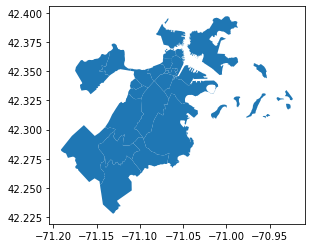

In [26]:
zones.plot()

In [27]:
zones.columns

Index(['geometry', 'OBJECTID', 'Name', 'Acres', 'Neighborhood_ID', 'SqMiles',
       'ShapeSTArea', 'ShapeSTLength'],
      dtype='object')

In [28]:
Boston_tracts

GEOID10 neighbour                                           geometry  \
9    25021416102     White  MULTIPOLYGON (((-71.13075 42.22796, -71.13074 ...   
68   25021416400     White  POLYGON ((-71.06813 42.27099, -71.06814 42.271...   
90   25021416300     White  MULTIPOLYGON (((-71.09374 42.26708, -71.09374 ...   
91   25021416200     White  POLYGON ((-71.09374 42.26711, -71.09374 42.267...   
102  25021402300     White  POLYGON ((-71.13666 42.23191, -71.13582 42.231...   
..           ...       ...                                                ...   
813  25025081300  Hispanic  POLYGON ((-71.09540 42.32325, -71.09536 42.323...   
924  25017373600     White  MULTIPOLYGON (((-71.16681 42.33930, -71.16681 ...   
925  25017373500     White  MULTIPOLYGON (((-71.17480 42.35026, -71.17471 ...   
967  25017342400     White  MULTIPOLYGON (((-71.07059 42.38968, -71.07063 ...   
973  25017373100     White  MULTIPOLYGON (((-71.16844 42.35914, -71.16853 ...   

                 tract_centroid  
9    POINT (-71.11949 42.23896)  
68   POINT (-71.06809 42.27103)  
90   POINT (-71.08812 42.26832)  
91   POINT (-71.09384 42.26710)  
102  POINT (-71.13350 42.22974)  
..                          ...  
813  POINT (-71.09769 42.31933)  
924  POINT (-71.16336 42.33361)  
925  POINT (-71.17145 42.34605)  
967  POINT (-71.06810 42.39299)  
973  POINT (-71.17122 42.35609)  

[208 rows x 4 columns]

In [29]:
type(Boston_tracts)

geopandas.geodataframe.GeoDataFrame

In [30]:
Boston_parks

new_id                                           geometry  \
42       osm_48  POLYGON ((-71.01516 42.33083, -71.01515 42.330...   
43       osm_49  POLYGON ((-71.11563 42.32323, -71.11578 42.323...   
52       osm_59  MULTIPOLYGON (((-71.11938 42.29989, -71.11921 ...   
53       osm_60  POLYGON ((-71.16275 42.33406, -71.16252 42.334...   
65       osm_74  MULTIPOLYGON (((-71.09136 42.30924, -71.09053 ...   
...         ...                                                ...   
7542  osm_11655  POLYGON ((-71.09344 42.34578, -71.09279 42.346...   
7543  osm_11656  POLYGON ((-71.09409 42.34536, -71.09408 42.345...   
7544  osm_11657  POLYGON ((-71.04965 42.35248, -71.04936 42.352...   
7548  osm_11666  POLYGON ((-71.05699 42.37698, -71.05660 42.376...   
7549  osm_11667  POLYGON ((-71.08708 42.33743, -71.08702 42.337...   

                   park_centroid  
42    POINT (-71.03701 42.33038)  
43    POINT (-71.11695 42.32306)  
52    POINT (-71.12415 42.29843)  
53    POINT (-71.15836 42.33675)  
65    POINT (-71.09479 42.30298)  
...                          ...  
7542  POINT (-71.09297 42.34581)  
7543  POINT (-71.09348 42.34589)  
7544  POINT (-71.04987 42.35201)  
7548  POINT (-71.05682 42.37685)  
7549  POINT (-71.08690 42.33738)  

[506 rows x 3 columns]

In [31]:
tract_centroids=gpd.GeoDataFrame(Boston_tracts[['GEOID10','neighbour','tract_centroid']],geometry='tract_centroid')
park_centroids=gpd.GeoDataFrame(Boston_parks[['new_id','park_centroid']],geometry='park_centroid')

In [32]:
tract_centroids.to_file('tract_centroids.geojson')
park_centroids.to_file('park_centroids.geojson')

# Census Tract Income

In [33]:
income=pd.read_csv(r'D:\Berkeley\CE263N\Project idea\ACSST5Y2018.S1902_2020-11-04T233028\ACSST5Y2018.S1902_data_with_overlays_2020-11-04T233025.csv',skiprows=1)

In [34]:
income=income[['id','Geographic Area Name', 'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households']]

In [35]:
income=income.rename(columns={'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households':'Mean income'})

In [36]:
id=[i.split('US')[-1] for i in np.array(income.id)]

In [37]:
income.id=id

In [38]:
income

id                               Geographic Area Name  \
0    25025000100      Census Tract 1, Suffolk County, Massachusetts   
1    25025000201   Census Tract 2.01, Suffolk County, Massachusetts   
2    25025000202   Census Tract 2.02, Suffolk County, Massachusetts   
3    25025000301   Census Tract 3.01, Suffolk County, Massachusetts   
4    25025000302   Census Tract 3.02, Suffolk County, Massachusetts   
..           ...                                                ...   
199  25025981502  Census Tract 9815.02, Suffolk County, Massachu...   
200  25025981600   Census Tract 9816, Suffolk County, Massachusetts   
201  25025981700   Census Tract 9817, Suffolk County, Massachusetts   
202  25025981800   Census Tract 9818, Suffolk County, Massachusetts   
203  25025990101  Census Tract 9901.01, Suffolk County, Massachu...   

    Mean income  
0        100193  
1        106950  
2        103198  
3        125179  
4        117576  
..          ...  
199           -  
200           -  
201           -  
202      195892  
203           N  

[204 rows x 3 columns]

In [39]:
income['Mean income'].describe()

count     204
unique    195
top         -
freq       10
Name: Mean income, dtype: object

In [40]:
income=income.drop(income[(income['Mean income']=='-')|(income['Mean income']=='N')].index)

In [41]:
income['Mean income']=income['Mean income'].astype('int')

In [42]:
income.sort_values('Mean income')

id                               Geographic Area Name  \
68  25025061101  Census Tract 611.01, Suffolk County, Massachus...   
65  25025060700    Census Tract 607, Suffolk County, Massachusetts   
85  25025080601  Census Tract 806.01, Suffolk County, Massachus...   
86  25025080801  Census Tract 808.01, Suffolk County, Massachus...   
84  25025080500    Census Tract 805, Suffolk County, Massachusetts   
..          ...                                                ...   
39  25025030300    Census Tract 303, Suffolk County, Massachusetts   
30  25025010801  Census Tract 108.01, Suffolk County, Massachus...   
76  25025070700    Census Tract 707, Suffolk County, Massachusetts   
75  25025070600    Census Tract 706, Suffolk County, Massachusetts   
29  25025010702  Census Tract 107.02, Suffolk County, Massachus...   

    Mean income  
68        22833  
65        27459  
85        29671  
86        32940  
84        33390  
..          ...  
39       210176  
30       212083  
76       216902  
75       257544  
29       275685  

[193 rows x 3 columns]

## Income Distribution

In [43]:
np.histogram(income['Mean income'])

(array([21, 51, 44, 36, 16,  8, 10,  5,  0,  2], dtype=int64),
 array([ 22833. ,  48118.2,  73403.4,  98688.6, 123973.8, 149259. ,
        174544.2, 199829.4, 225114.6, 250399.8, 275685. ]))

In [44]:
from matplotlib import pyplot as plt

In [45]:
incomes=income['Mean income']

In [46]:
income_hist=np.histogram(income['Mean income'],bins=15,density=True)
income_hist

(array([2.76636873e-06, 6.76223467e-06, 1.26023464e-05, 1.19875978e-05,
        7.99173188e-06, 4.61061454e-06, 3.99586594e-06, 1.53687151e-06,
        1.84424582e-06, 2.15162012e-06, 1.53687151e-06, 9.22122909e-07,
        0.00000000e+00, 3.07374303e-07, 3.07374303e-07]),
 array([ 22833. ,  39689.8,  56546.6,  73403.4,  90260.2, 107117. ,
        123973.8, 140830.6, 157687.4, 174544.2, 191401. , 208257.8,
        225114.6, 241971.4, 258828.2, 275685. ]))

Text(0, 0.5, 'P(income)')

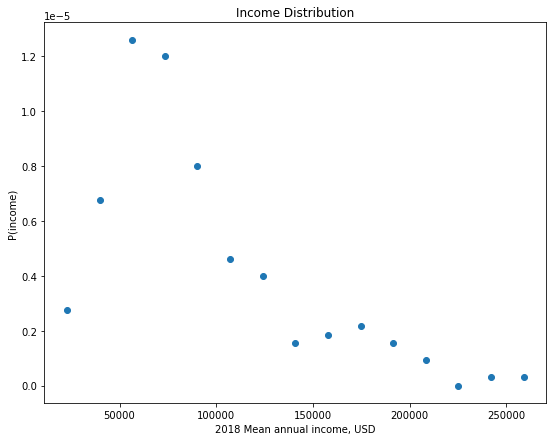

In [47]:
fig,ax=plt.subplots()
fig.set_size_inches((9, 7))
ax.scatter(income_hist[1][:-1],income_hist[0])
ax.set_title('Income Distribution')
ax.set_xlabel('2018 Mean annual income, USD')
ax.set_ylabel('P(income)')

In [48]:
income_Boston=pd.merge(odw,income,how='inner',left_on='tract',right_on='id')

<AxesSubplot:>

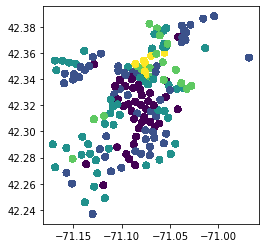

In [49]:
gpd.GeoDataFrame(income_Boston,geometry='tract_centroid').plot(column='Mean income',scheme='naturalbreaks')

# OD matrix to OD routes

In [50]:
# extract route network from flow dataframe

def routeNetwork (G, fdf):
    routes=[]
    temp=fdf.iloc()
    for i in range(len(fdf)):
        origin=ox.get_nearest_node(G,(temp[i].tract_centroid.y,temp[i].tract_centroid.x))
        destination=ox.get_nearest_node(G,(temp[i].park_centroid.y,temp[i].park_centroid.x))
        route=ox.shortest_path(G,origin,destination)
        routes.append(route)
    
    return routes


In [51]:
from shapely.geometry import MultiLineString
def route_to_geo(G,osmRoutes):
    test_gdf=[]
    edges = ox.graph_to_gdfs(G, nodes=False).set_index(['u', 'v']).sort_index()
    for route in osmRoutes:
        route_pairwise = zip(route[:-1], route[1:])
        lines = [edges.loc[uv, 'geometry'].iloc[0] for uv in route_pairwise]
        multiline=MultiLineString(lines)
        test_gdf.append(multiline)
    return(test_gdf)

In [52]:
income_Boston[['tract','tract_centroid','park','park_centroid']]

tract              tract_centroid       park  \
0      25025000100  POINT (-71.13859 42.36148)  osm_10006   
1      25025000100  POINT (-71.13859 42.36148)  osm_10163   
2      25025000100  POINT (-71.13859 42.36148)  osm_10164   
3      25025000100  POINT (-71.13859 42.36148)  osm_10225   
4      25025000100  POINT (-71.13859 42.36148)  osm_10235   
...            ...                         ...        ...   
50322  25025981100  POINT (-71.10471 42.28790)   osm_7680   
50323  25025981100  POINT (-71.10471 42.28790)   osm_7941   
50324  25025981100  POINT (-71.10471 42.28790)   osm_8733   
50325  25025981100  POINT (-71.10471 42.28790)   osm_9075   
50326  25025981100  POINT (-71.10471 42.28790)   osm_9080   

                    park_centroid  
0      POINT (-71.09818 42.33470)  
1      POINT (-71.12698 42.30325)  
2      POINT (-71.12704 42.30256)  
3      POINT (-71.04911 42.35279)  
4      POINT (-71.08711 42.34110)  
...                           ...  
50322  POINT (-71.09137 42.26693)  
50323  POINT (-71.05186 42.35868)  
50324  POINT (-71.12157 42.28211)  
50325  POINT (-71.08726 42.33063)  
50326  POINT (-71.10331 42.33239)  

[50327 rows x 4 columns]

In [53]:
def geometryX(geometry):
    return geometry.x
def geometryY(geometry):
    return geometry.y


In [54]:
import time

In [55]:
tc=np.array(income_Boston.tract_centroid)
pc=np.array(income_Boston.park_centroid)


In [56]:
# list comprehension
print(time.time())
tcy=[geometry.y for geometry in tc]
tcx=[geometry.x for geometry in tc]
pcy=[geometry.y for geometry in pc]
pcx=[geometry.x for geometry in pc]
print(time.time())

1607293539.6044116
1607293541.3733788


In [57]:
origins=np.array([tcy,tcx]).T
destinations=np.array([pcy,pcx]).T

In [58]:
print(time.time())
nearest_origins=[ox.get_nearest_node(G,origin)for origin in origins]
print(time.time())

1607293541.393314
1607294389.379904


In [59]:
print(time.time())
nearest_destinations=[ox.get_nearest_node(G,dest)for dest in destinations]
print(time.time())

1607294389.3868864
1607295238.234558


In [60]:
ODs=np.array([nearest_origins,nearest_destinations]).T

In [61]:
ODs

array([[3518393250,   61518612],
       [3518393250,   61384838],
       [3518393250,   61348370],
       ...,
       [  61347679,   61351687],
       [  61347679,   61353286],
       [  61347679,   61517805]], dtype=int64)

In [62]:
len(ODs)

50327

In [63]:
print(time.time())
routes=[ox.shortest_path(G,OD[0],OD[1]) for OD in ODs]
print(time.time())

1607295238.2694647
1607296530.2365732


In [64]:
np.array(routes)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([list([3518393250, 61339912, 61464455, 61340063, 61340065, 61340570, 61340598, 61354097, 61355402, 61340611, 61402375, 61402361, 61402357, 61402364, 61407423, 61373966, 61373964, 61361949, 61343981, 61341955, 61362824, 61357261, 61357264, 61357259, 61355208, 61502784, 61502836, 61488007, 3330883250, 3329188824, 61342284, 61452714, 61368579, 61368592, 61366547, 61348915, 61366556, 61382582, 61373703, 61366526, 61366524, 539990286, 519642929, 2065550031, 63537392, 61367392, 61455275, 61342433, 61389587, 1220083322, 61358045, 61349184, 61351869, 61351830, 61342790, 61342819, 61342817, 61344074, 3427729705, 3449042126, 61505108, 61358275, 61358270, 1028636639, 61344274, 61344285, 61344284, 61399918, 61399912, 61399913, 61378480, 2378746936, 61459167, 61344084, 61344146, 61518612]),
       list([3518393250, 61339912, 61464455, 61340063, 61340065, 61340570, 61340598, 61354097, 61355402, 61340611, 61402375, 61402361, 61402357, 61402364, 61407423, 61373966, 61373964, 61361949, 61343981, 

In [65]:
print(time.time())
routes_geo=route_to_geo(G,routes)
print(time.time())

1607296530.4589787
1607299260.6612067


In [66]:
len(routes_geo)

50327

In [67]:
income_Boston['route_geometry']=gpd.GeoSeries(routes_geo)

In [68]:
income_Boston=gpd.GeoDataFrame(income_Boston,geometry='route_geometry',crs='EPSG:4326')

In [69]:
reproj=income_Boston.to_crs('EPSG:26919')

In [70]:
length_m=reproj['route_geometry'].length

Text(0.5, 1.0, 'Route length distribution')

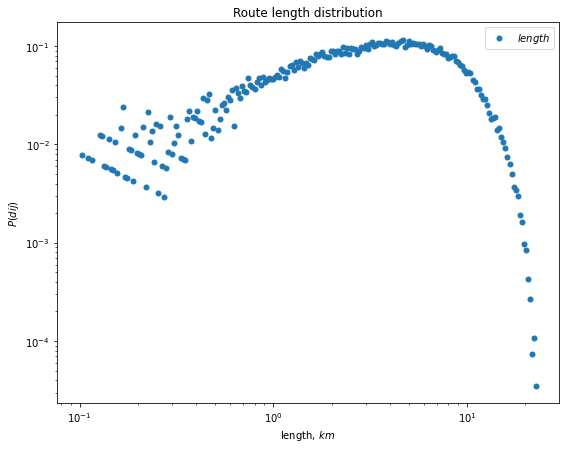

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = int(np.rint(np.sqrt(len(length_m))))
logBins = np.logspace(np.log10(min(length_m)/1000+0.1), np.log10(max(length_m)/1000),num=n_bins)
logBinDensity, binedges = np.histogram(length_m/1000, bins=logBins, density=True)


ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$length$')

ax.legend(fontsize=10)


ax.set_xlabel('length, $km$',fontsize=10)
ax.set_ylabel('$P(dij)$',fontsize=10) 
plt.title('Route length distribution')

In [72]:
reproj.head()

tract              tract_centroid       park  \
0  25025000100  POINT (-71.13859 42.36148)  osm_10006   
1  25025000100  POINT (-71.13859 42.36148)  osm_10163   
2  25025000100  POINT (-71.13859 42.36148)  osm_10164   
3  25025000100  POINT (-71.13859 42.36148)  osm_10225   
4  25025000100  POINT (-71.13859 42.36148)  osm_10235   

                park_centroid  weights neighbour           id  \
0  POINT (-71.09818 42.33470)        3     White  25025000100   
1  POINT (-71.12698 42.30325)        1     White  25025000100   
2  POINT (-71.12704 42.30256)        1     White  25025000100   
3  POINT (-71.04911 42.35279)        2     White  25025000100   
4  POINT (-71.08711 42.34110)        1     White  25025000100   

                            Geographic Area Name  Mean income  \
0  Census Tract 1, Suffolk County, Massachusetts       100193   
1  Census Tract 1, Suffolk County, Massachusetts       100193   
2  Census Tract 1, Suffolk County, Massachusetts       100193   
3  Census Tract 1, Suffolk County, Massachusetts       100193   
4  Census Tract 1, Suffolk County, Massachusetts       100193   

                                      route_geometry  
0  MULTILINESTRING ((323859.242 4692114.967, 3238...  
1  MULTILINESTRING ((323859.242 4692114.967, 3238...  
2  MULTILINESTRING ((323859.242 4692114.967, 3238...  
3  MULTILINESTRING ((323859.242 4692114.967, 3238...  
4  MULTILINESTRING ((323859.242 4692114.967, 3238...

In [73]:
income_Boston.head()

tract              tract_centroid       park  \
0  25025000100  POINT (-71.13859 42.36148)  osm_10006   
1  25025000100  POINT (-71.13859 42.36148)  osm_10163   
2  25025000100  POINT (-71.13859 42.36148)  osm_10164   
3  25025000100  POINT (-71.13859 42.36148)  osm_10225   
4  25025000100  POINT (-71.13859 42.36148)  osm_10235   

                park_centroid  weights neighbour           id  \
0  POINT (-71.09818 42.33470)        3     White  25025000100   
1  POINT (-71.12698 42.30325)        1     White  25025000100   
2  POINT (-71.12704 42.30256)        1     White  25025000100   
3  POINT (-71.04911 42.35279)        2     White  25025000100   
4  POINT (-71.08711 42.34110)        1     White  25025000100   

                            Geographic Area Name  Mean income  \
0  Census Tract 1, Suffolk County, Massachusetts       100193   
1  Census Tract 1, Suffolk County, Massachusetts       100193   
2  Census Tract 1, Suffolk County, Massachusetts       100193   
3  Census Tract 1, Suffolk County, Massachusetts       100193   
4  Census Tract 1, Suffolk County, Massachusetts       100193   

                                      route_geometry  
0  MULTILINESTRING ((-71.13895 42.36136, -71.1389...  
1  MULTILINESTRING ((-71.13895 42.36136, -71.1389...  
2  MULTILINESTRING ((-71.13895 42.36136, -71.1389...  
3  MULTILINESTRING ((-71.13895 42.36136, -71.1388...  
4  MULTILINESTRING ((-71.13895 42.36136, -71.1389...

In [74]:
income_Boston['routes']=routes

In [75]:
gpd.GeoDataFrame(income_Boston[['tract','park','weights','neighbour','id','Geographic Area Name','Mean income','route_geometry']],geometry='route_geometry').to_file('all_routes.gpkg')

In [76]:
weights=np.array(income_Boston.weights)

hist=np.histogram(weights)

In [77]:
type(income_Boston['route_geometry'])

geopandas.geoseries.GeoSeries

Text(0.5, 1.0, 'Weight distribution of all OD pairs')

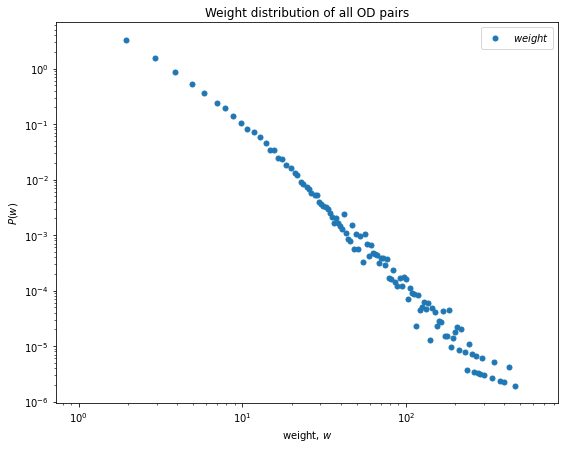

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = int(np.rint(np.sqrt(len(length_m))))
logBins = np.logspace(np.log10(min(weights)+0.001), np.log10(max(weights)),num=n_bins)
logBinDensity, binedges = np.histogram(weights, bins=logBins, density=True)


ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$weight$')

ax.legend(fontsize=10)


ax.set_xlabel('weight, $w$',fontsize=10)
ax.set_ylabel('$P(w)$',fontsize=10) 
plt.title('Weight distribution of all OD pairs')

# Lowest/Highest income tracts

In [79]:
lowest=income.sort_values('Mean income')[0:10]
highest=income.sort_values('Mean income',ascending=False)[0:10]

In [80]:
len(lowest)

10

In [81]:
len(highest)

10

In [82]:
lowest

id                               Geographic Area Name  \
68   25025061101  Census Tract 611.01, Suffolk County, Massachus...   
65   25025060700    Census Tract 607, Suffolk County, Massachusetts   
85   25025080601  Census Tract 806.01, Suffolk County, Massachus...   
86   25025080801  Census Tract 808.01, Suffolk County, Massachus...   
84   25025080500    Census Tract 805, Suffolk County, Massachusetts   
24   25025010405  Census Tract 104.05, Suffolk County, Massachus...   
91   25025081300    Census Tract 813, Suffolk County, Massachusetts   
88   25025081001  Census Tract 810.01, Suffolk County, Massachus...   
96   25025081900    Census Tract 819, Suffolk County, Massachusetts   
100  25025090200    Census Tract 902, Suffolk County, Massachusetts   

     Mean income  
68         22833  
65         27459  
85         29671  
86         32940  
84         33390  
24         34402  
91         34590  
88         36780  
96         38962  
100        41877

In [83]:
highest

id                               Geographic Area Name  \
29   25025010702  Census Tract 107.02, Suffolk County, Massachus...   
75   25025070600    Census Tract 706, Suffolk County, Massachusetts   
76   25025070700    Census Tract 707, Suffolk County, Massachusetts   
30   25025010801  Census Tract 108.01, Suffolk County, Massachus...   
39   25025030300    Census Tract 303, Suffolk County, Massachusetts   
31   25025010802  Census Tract 108.02, Suffolk County, Massachus...   
32   25025020101  Census Tract 201.01, Suffolk County, Massachus...   
202  25025981800   Census Tract 9818, Suffolk County, Massachusetts   
27   25025010600    Census Tract 106, Suffolk County, Massachusetts   
28   25025010701  Census Tract 107.01, Suffolk County, Massachus...   

     Mean income  
29        275685  
75        257544  
76        216902  
30        212083  
39        210176  
31        205227  
32        201483  
202       195892  
27        195377  
28        191480

# Income top poor 10 tracts

In [84]:
min_income_tracts=income_Boston[income_Boston['tract'].isin(lowest['id'])]

In [85]:
min_income_tracts.tract.unique()

array(['25025010405', '25025060700', '25025061101', '25025080500',
       '25025080601', '25025080801', '25025081001', '25025081300',
       '25025081900', '25025090200'], dtype=object)

In [86]:
min_income_tracts.neighbour.unique()

array(['White', 'Hispanic', 'Black'], dtype=object)

In [87]:
income_Boston.shape

(50327, 11)

In [88]:
sum(min_income_tracts.weights)

27404

In [89]:
min_income_tracts

tract              tract_centroid       park  \
6456   25025010405  POINT (-71.08961 42.33987)  osm_10006   
6457   25025010405  POINT (-71.08961 42.33987)  osm_10181   
6458   25025010405  POINT (-71.08961 42.33987)  osm_10215   
6459   25025010405  POINT (-71.08961 42.33987)  osm_10225   
6460   25025010405  POINT (-71.08961 42.33987)  osm_10235   
...            ...                         ...        ...   
24298  25025090200  POINT (-71.07906 42.30714)   osm_9780   
24299  25025090200  POINT (-71.07906 42.30714)   osm_9781   
24300  25025090200  POINT (-71.07906 42.30714)   osm_9851   
24301  25025090200  POINT (-71.07906 42.30714)   osm_9883   
24302  25025090200  POINT (-71.07906 42.30714)   osm_9968   

                    park_centroid  weights neighbour           id  \
6456   POINT (-71.09818 42.33470)       37     White  25025010405   
6457   POINT (-71.11099 42.30627)        2     White  25025010405   
6458   POINT (-71.04249 42.36882)        1     White  25025010405   
6459   POINT (-71.04911 42.35279)        1     White  25025010405   
6460   POINT (-71.08711 42.34110)       66     White  25025010405   
...                           ...      ...       ...          ...   
24298  POINT (-71.04548 42.34750)        4     Black  25025090200   
24299  POINT (-71.04423 42.34655)        4     Black  25025090200   
24300  POINT (-71.08460 42.34637)       15     Black  25025090200   
24301  POINT (-71.09940 42.34330)        1     Black  25025090200   
24302  POINT (-71.04675 42.35471)        1     Black  25025090200   

                                    Geographic Area Name  Mean income  \
6456   Census Tract 104.05, Suffolk County, Massachus...        34402   
6457   Census Tract 104.05, Suffolk County, Massachus...        34402   
6458   Census Tract 104.05, Suffolk County, Massachus...        34402   
6459   Census Tract 104.05, Suffolk County, Massachus...        34402   
6460   Census Tract 104.05, Suffolk County, Massachus...        34402   
...                                                  ...          ...   
24298    Census Tract 902, Suffolk County, Massachusetts        41877   
24299    Census Tract 902, Suffolk County, Massachusetts        41877   
24300    Census Tract 902, Suffolk County, Massachusetts        41877   
24301    Census Tract 902, Suffolk County, Massachusetts        41877   
24302    Census Tract 902, Suffolk County, Massachusetts        41877   

                                          route_geometry  \
6456   MULTILINESTRING ((-71.09056 42.33959, -71.0906...   
6457   MULTILINESTRING ((-71.09056 42.33959, -71.0906...   
6458   MULTILINESTRING ((-71.09056 42.33959, -71.0904...   
6459   MULTILINESTRING ((-71.09056 42.33959, -71.0904...   
6460   MULTILINESTRING ((-71.09056 42.33959, -71.0904...   
...                                                  ...   
24298  MULTILINESTRING ((-71.07896 42.30749, -71.0783...   
24299  MULTILINESTRING ((-71.07896 42.30749, -71.0783...   
24300  MULTILINESTRING ((-71.07896 42.30749, -71.0783...   
24301  MULTILINESTRING ((-71.07896 42.30749, -71.0783...   
24302  MULTILINESTRING ((-71.07896 42.30749, -71.0783...   

                                                  routes  
6456   [6234776592, 6234776595, 61385841, 61374381, 6...  
6457   [6234776592, 6234776595, 61385841, 61374381, 6...  
6458   [6234776592, 61343390, 61371056, 1024147105, 6...  
6459   [6234776592, 61343390, 61371056, 1024147105, 6...  
6460                    [6234776592, 61343390, 61342673]  
...                                                  ...  
24298  [61505833, 61505782, 61355747, 61349842, 61364...  
24299  [61505833, 61505782, 61355747, 61349842, 61364...  
24300  [61505833, 61505782, 61355747, 61355744, 38013...  
24301  [61505833, 61505782, 61355747, 61355744, 38013...  
24302  [61505833, 61505782, 61355747, 61349842, 61364...  

[3096 rows x 11 columns]

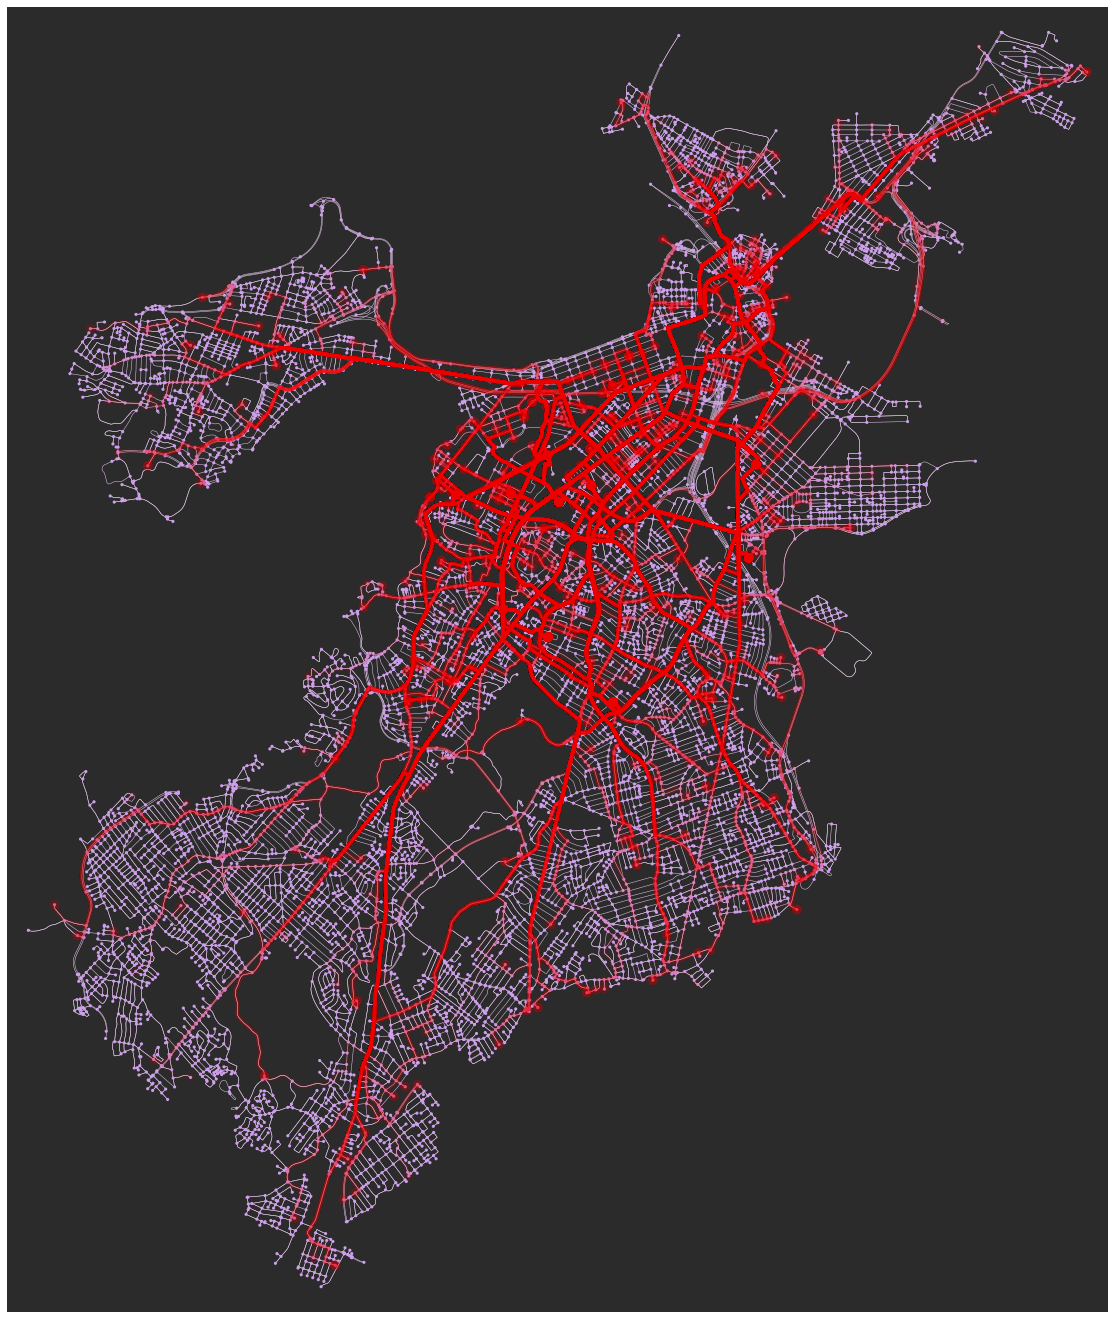

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

In [90]:
min_income_routes=list(min_income_tracts['routes'])

ox.plot.plot_graph_routes(G,min_income_routes,figsize=(24,24), 
                         route_color='#c99649',
                          route_linewidth=4, route_alpha=0.05,node_size=10,
                          edge_linewidth=0.5,bgcolor='#2b2b2b',node_color='#ce9fed',edge_color='#e8c7ed',
                         orig_dest_size=100)

In [91]:
poorWeights=min_income_tracts['weights']

Text(0.5, 1.0, 'Data weighted degree distribution')

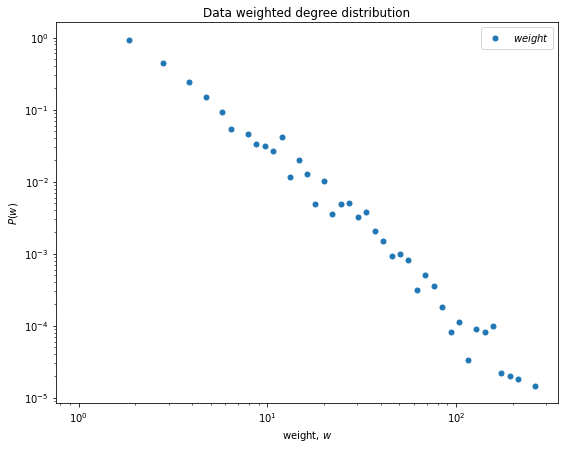

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = int(np.rint(np.sqrt(len(poorWeights))))
logBins = np.logspace(np.log10(min(poorWeights)+0.001), np.log10(max(poorWeights)),num=n_bins)
logBinDensity, binedges = np.histogram(poorWeights, bins=logBins, density=True)


ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$weight$')

ax.legend(fontsize=10)


ax.set_xlabel('weight, $w$',fontsize=10)
ax.set_ylabel('$P(w)$',fontsize=10) 
plt.title('Data weighted degree distribution')

In [93]:
poorLengths=reproj[reproj['tract'].isin(lowest['id'])]['route_geometry'].length

Text(0.5, 1.0, 'Route length distribution')

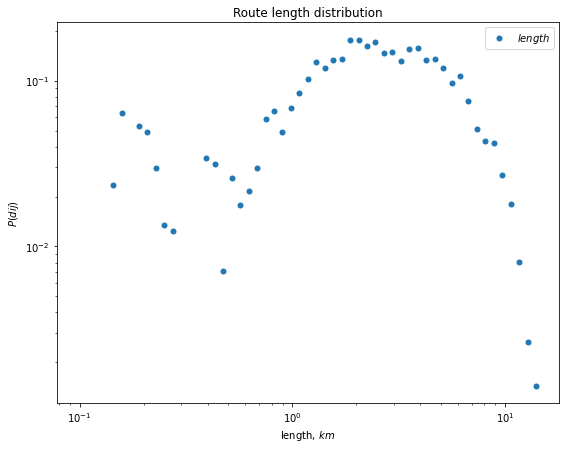

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = int(np.rint(np.sqrt(len(poorWeights))))
logBins = np.logspace(np.log10(min(poorLengths/1000)+0.1), np.log10(max(poorLengths/1000)),num=n_bins)
logBinDensity, binedges = np.histogram(poorLengths/1000, bins=logBins, density=True)


ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$length$')

ax.legend(fontsize=10)


ax.set_xlabel('length, $km$',fontsize=10)
ax.set_ylabel('$P(dij)$',fontsize=10) 
plt.title('Route length distribution')

In [95]:
len(poorLengths)

3096

NameError: name 'richWeights' is not defined

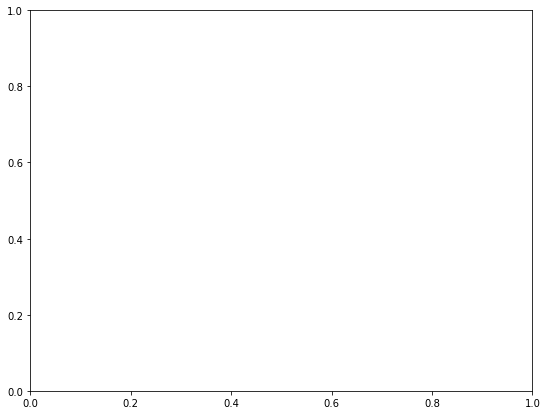

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))
w_graphs=[weights,np.array(richWeights), np.array(poorWeights)]
w_labels=['Whole population', 'Rich','Poor']
color=['#252e4b','#9e1252','#6382e5']

for i in range(len(w_graphs)):
    n_bins = int(np.rint(np.sqrt(len(w_graphs[i]))))
    logBins = np.logspace(np.log10(min(w_graphs[i])+0.001), np.log10(max(w_graphs[i])),num=n_bins)
    logBinDensity, binedges = np.histogram(w_graphs[i], bins=logBins, density=True)


    ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=w_labels[i],color=color[i])

    ax.legend(fontsize=10)


ax.set_xlabel('weight, $w$',fontsize=10)
ax.set_ylabel('$P(w)$',fontsize=10) 
plt.title('Weight distribution of all OD pairs')

In [ ]:
w_graphs[i]

In [ ]:
len(w_graphs[0])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

l_graphs=[np.array(length_m),np.array(poorLengths),np.array(richLengths)]
l_labels=['Whole population', 'Rich','Poor']
color=['#252e4b','#9e1252','#6382e5']

for i in range(len(l_graphs)):
    n_bins = int(np.rint(np.sqrt(len(l_graphs[i]))))
    logBins = np.logspace(np.log10(min(l_graphs[i]/1000)+0.001), np.log10(max(l_graphs[i]/1000)),num=n_bins)
    logBinDensity, binedges = np.histogram(l_graphs[i]/1000, bins=logBins, density=True)


    ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=l_labels[i],color=color[i])

    ax.legend(fontsize=10)



ax.set_xlabel('length, $km$',fontsize=10)
ax.set_ylabel('$P(dij)$',fontsize=10) 
ax.legend(loc=1)
plt.xlim(10e-3,10e1)
plt.title('Route length distribution')


# Income top 10 rich tracts

In [98]:
max_income_tracts=income_Boston[income_Boston['tract'].isin(highest['id'])]

In [99]:
max_income_tracts.tract.unique()

array(['25025010600', '25025010701', '25025010702', '25025010801',
       '25025010802', '25025030300', '25025070600', '25025070700',
       '25025020101'], dtype=object)

In [100]:
max_income_tracts.neighbour.unique()

array(['White'], dtype=object)

In [101]:
max_income_tracts.shape

(2591, 11)

In [102]:
sum(max_income_tracts['weights'])

26316

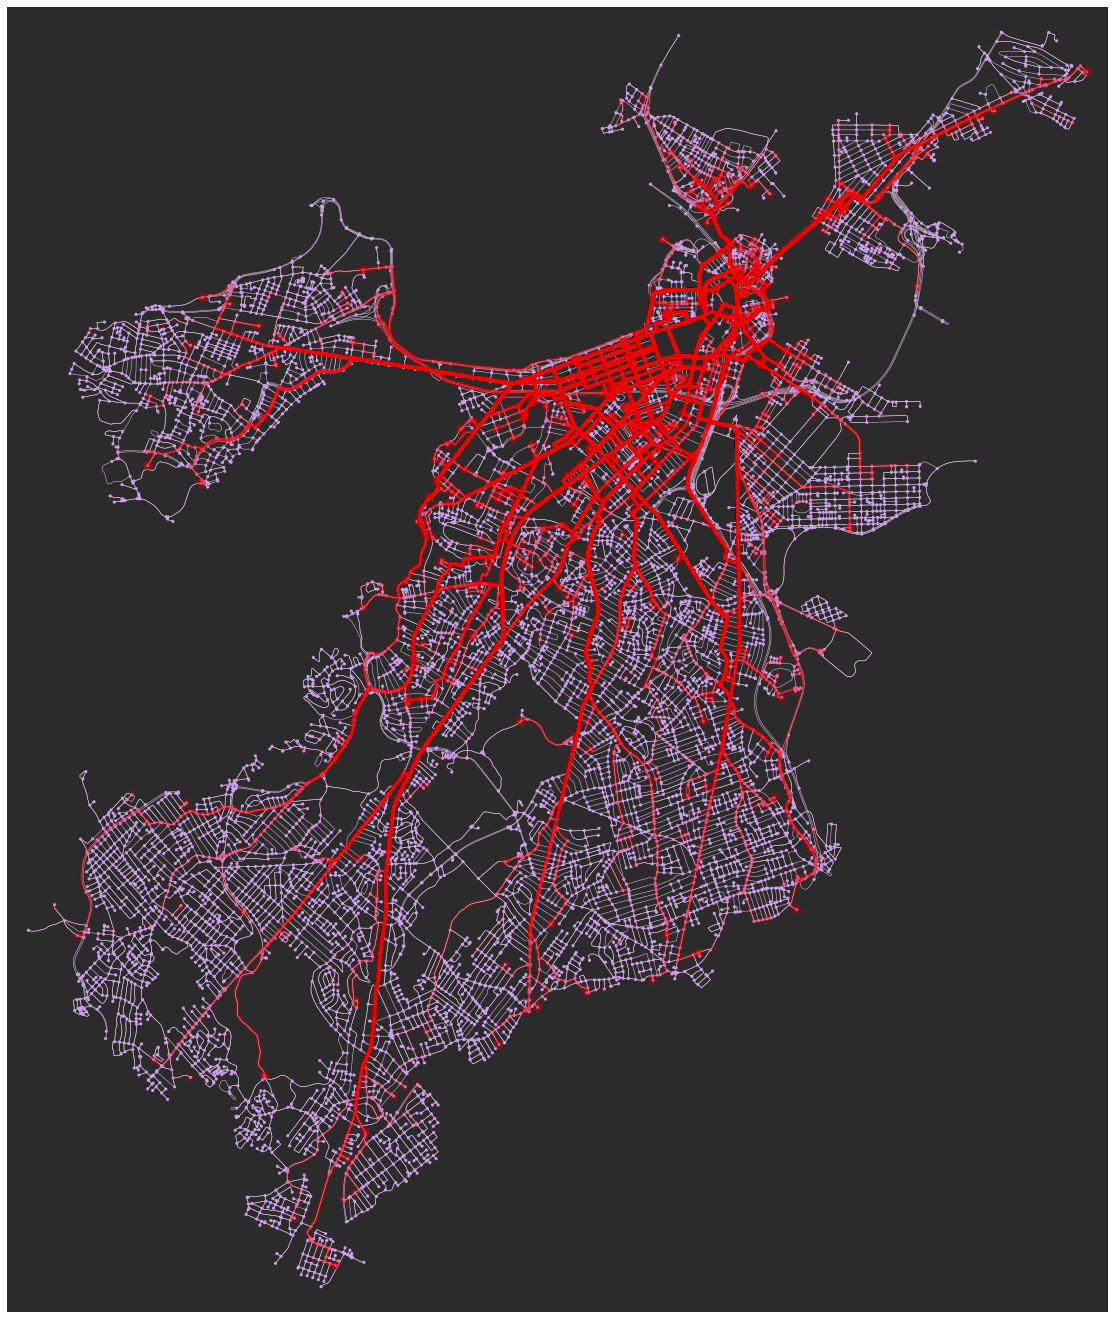

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

In [103]:
max_income_routes=list(max_income_tracts['routes'])

ox.plot.plot_graph_routes(G,max_income_routes,figsize=(24,24), 
                         route_color='#c99649',
                          route_linewidth=4, route_alpha=0.05,node_size=10,
                          edge_linewidth=0.5,bgcolor='#2b2b2b',node_color='#ce9fed',edge_color='#e8c7ed',
                         orig_dest_size=100)

In [104]:
richWeights=max_income_tracts['weights']

Text(0.5, 1.0, 'Data weighted degree distribution')

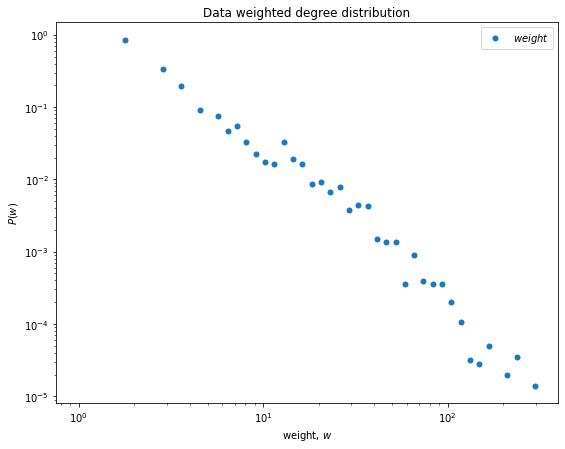

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = int(np.rint(np.sqrt(len(richWeights))))
logBins = np.logspace(np.log10(min(richWeights)+0.001), np.log10(max(richWeights)),num=n_bins)
logBinDensity, binedges = np.histogram(richWeights, bins=logBins, density=True)


ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$weight$')

ax.legend(fontsize=10)


ax.set_xlabel('weight, $w$',fontsize=10)
ax.set_ylabel('$P(w)$',fontsize=10) 
plt.title('Data weighted degree distribution')

In [106]:
richLengths=reproj[reproj['tract'].isin(highest['id'])]['route_geometry'].length

Text(0.5, 1.0, 'Route length distribution')

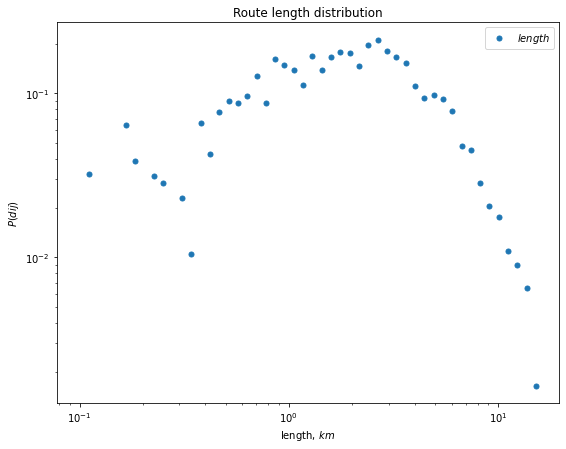

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = int(np.rint(np.sqrt(len(richLengths))))
logBins = np.logspace(np.log10(min(richLengths/1000)+0.1), np.log10(max(richLengths/1000)),num=n_bins)
logBinDensity, binedges = np.histogram(richLengths/1000, bins=logBins, density=True)


ax.loglog(logBins[:-1], logBinDensity,'o', markersize=5,label=r'$length$')

ax.legend(fontsize=10)


ax.set_xlabel('length, $km$',fontsize=10)
ax.set_ylabel('$P(dij)$',fontsize=10) 
plt.title('Route length distribution')

In [ ]:
import mpmath
import powerlaw 
import scipy as sp

In [ ]:
fit=powerlaw.Fit(weights,discrete=True)

In [ ]:
print ('alpha =',fit.power_law.alpha)   #exponent of the power law
print ('standard error =',fit.power_law.sigma)  #standard error oof the fit
print ('xmin =',fit.xmin) #xmin

In [ ]:
fit=powerlaw.Fit(richWeights,discrete=True)
print ('alpha =',fit.power_law.alpha)   #exponent of the power law
print ('standard error =',fit.power_law.sigma)  #standard error oof the fit
print ('xmin =',fit.xmin) #xmin

In [ ]:
fit=powerlaw.Fit(poorWeights,discrete=True)
print ('alpha =',fit.power_law.alpha)   #exponent of the power law
print ('standard error =',fit.power_law.sigma)  #standard error oof the fit
print ('xmin =',fit.xmin) #xmin

In [ ]:
fit=powerlaw.Fit(length_m,discrete=True)
print ('alpha =',fit.power_law.alpha)   #exponent of the power law
print ('standard error =',fit.power_law.sigma)  #standard error oof the fit
print ('xmin =',fit.xmin) #xmin

In [ ]:
fit=powerlaw.Fit(richLengths,discrete=True)
print ('alpha =',fit.power_law.alpha)   #exponent of the power law
print ('standard error =',fit.power_law.sigma)  #standard error oof the fit
print ('xmin =',fit.xmin) #xmin

In [ ]:
fit=powerlaw.Fit(poorLengths,discrete=True)
print ('alpha =',fit.power_law.alpha)   #exponent of the power law
print ('standard error =',fit.power_law.sigma)  #standard error oof the fit
print ('xmin =',fit.xmin) #xmin

In [ ]:
power=np.power(np.array(length_m),-4.472)
plt.loglog(np.array(length_m),power)

# Weights>=10

In [108]:
w10=income_Boston[income_Boston['weights']>=10]
w10.shape

(11843, 11)

In [109]:
w10.head()

tract              tract_centroid       park  \
6   25025000100  POINT (-71.13859 42.36148)  osm_10290   
14  25025000100  POINT (-71.13859 42.36148)  osm_10580   
24  25025000100  POINT (-71.13859 42.36148)  osm_11039   
27  25025000100  POINT (-71.13859 42.36148)    osm_111   
33  25025000100  POINT (-71.13859 42.36148)  osm_11595   

                 park_centroid  weights neighbour           id  \
6   POINT (-71.06385 42.35022)       15     White  25025000100   
14  POINT (-71.14277 42.35696)       20     White  25025000100   
24  POINT (-71.10946 42.33566)       13     White  25025000100   
27  POINT (-71.09682 42.34115)       18     White  25025000100   
33  POINT (-71.07958 42.34839)       15     White  25025000100   

                             Geographic Area Name  Mean income  \
6   Census Tract 1, Suffolk County, Massachusetts       100193   
14  Census Tract 1, Suffolk County, Massachusetts       100193   
24  Census Tract 1, Suffolk County, Massachusetts       100193   
27  Census Tract 1, Suffolk County, Massachusetts       100193   
33  Census Tract 1, Suffolk County, Massachusetts       100193   

                                       route_geometry  \
6   MULTILINESTRING ((-71.13895 42.36136, -71.1388...   
14  MULTILINESTRING ((-71.13895 42.36136, -71.1389...   
24  MULTILINESTRING ((-71.13895 42.36136, -71.1389...   
27  MULTILINESTRING ((-71.13895 42.36136, -71.1389...   
33  MULTILINESTRING ((-71.13895 42.36136, -71.1388...   

                                               routes  
6   [3518393250, 3518393255, 3518390018, 61339668,...  
14  [3518393250, 61339912, 61464455, 61340063, 613...  
24  [3518393250, 61339912, 61464455, 61340063, 613...  
27  [3518393250, 61339912, 61464455, 61340063, 613...  
33  [3518393250, 3518393255, 3518390018, 61339668,...

In [110]:
sum(w10['weights'])

288459

In [111]:
income_Boston.shape

(50327, 11)

In [112]:
sum(income_Boston['weights'])

413585

In [113]:
richTractsW10=w10[w10['tract'].isin(highest['id'])]
richTractsW10.shape

(740, 11)

In [114]:
sum(richTractsW10['weights'])

20636

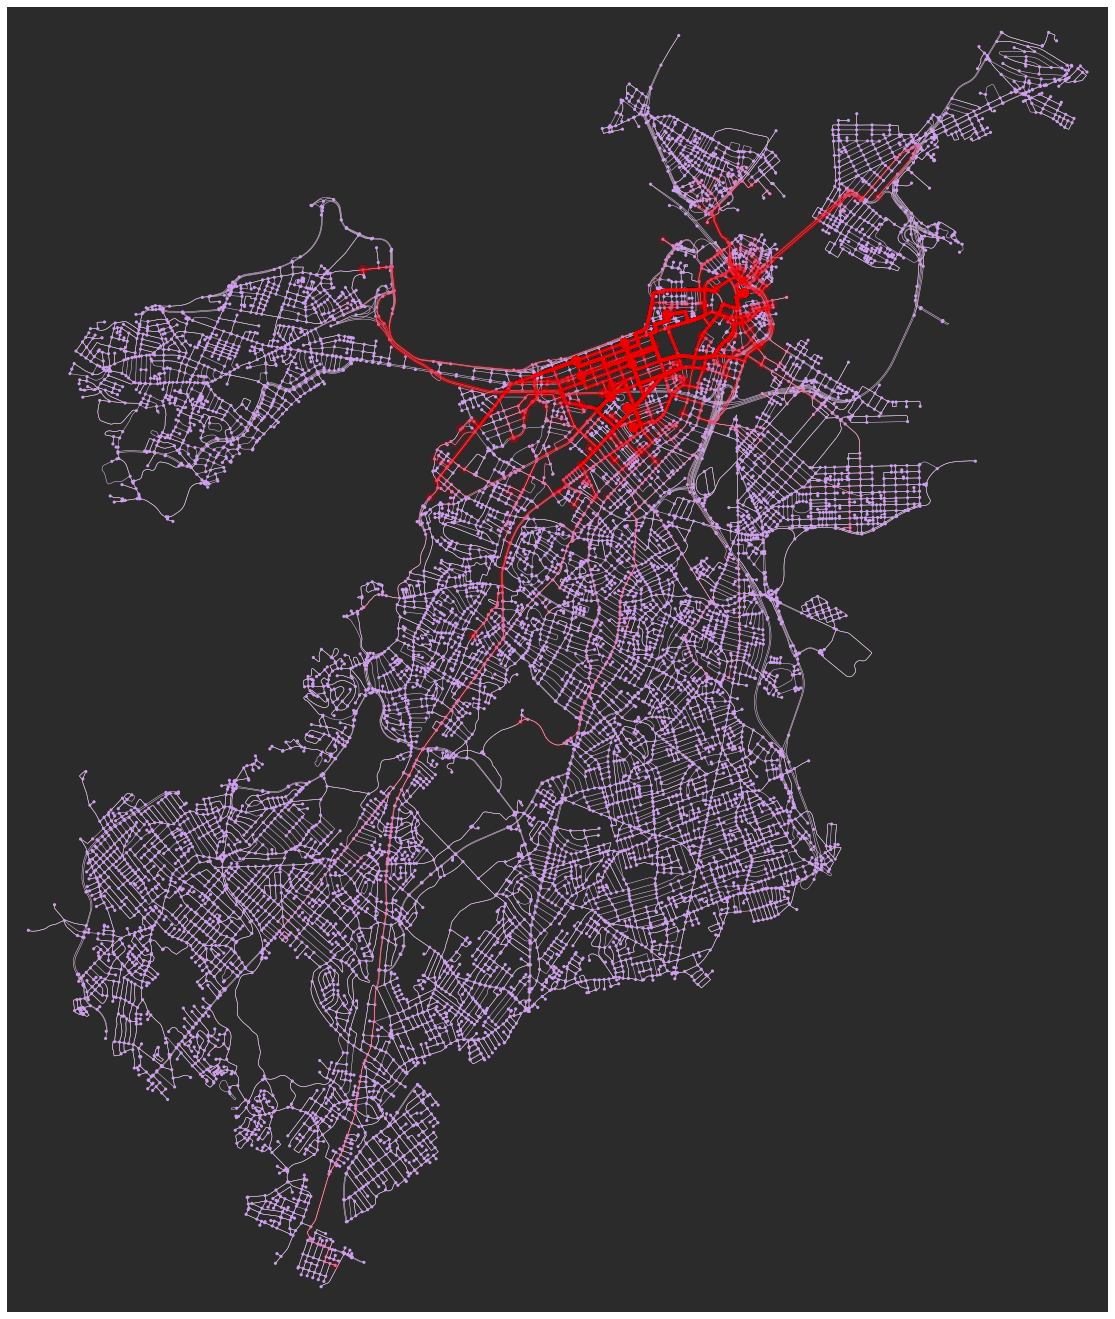

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

In [115]:
ox.plot.plot_graph_routes(G,list(richTractsW10['routes']),figsize=(24,24), 
                         route_color='#c99649',
                          route_linewidth=4, route_alpha=0.05,node_size=10,
                          edge_linewidth=0.5,bgcolor='#2b2b2b',node_color='#ce9fed',edge_color='#e8c7ed',
                         orig_dest_size=100)

In [116]:
poorTractsW10=w10[w10['tract'].isin(lowest['id'])]
poorTractsW10.shape

(786, 11)

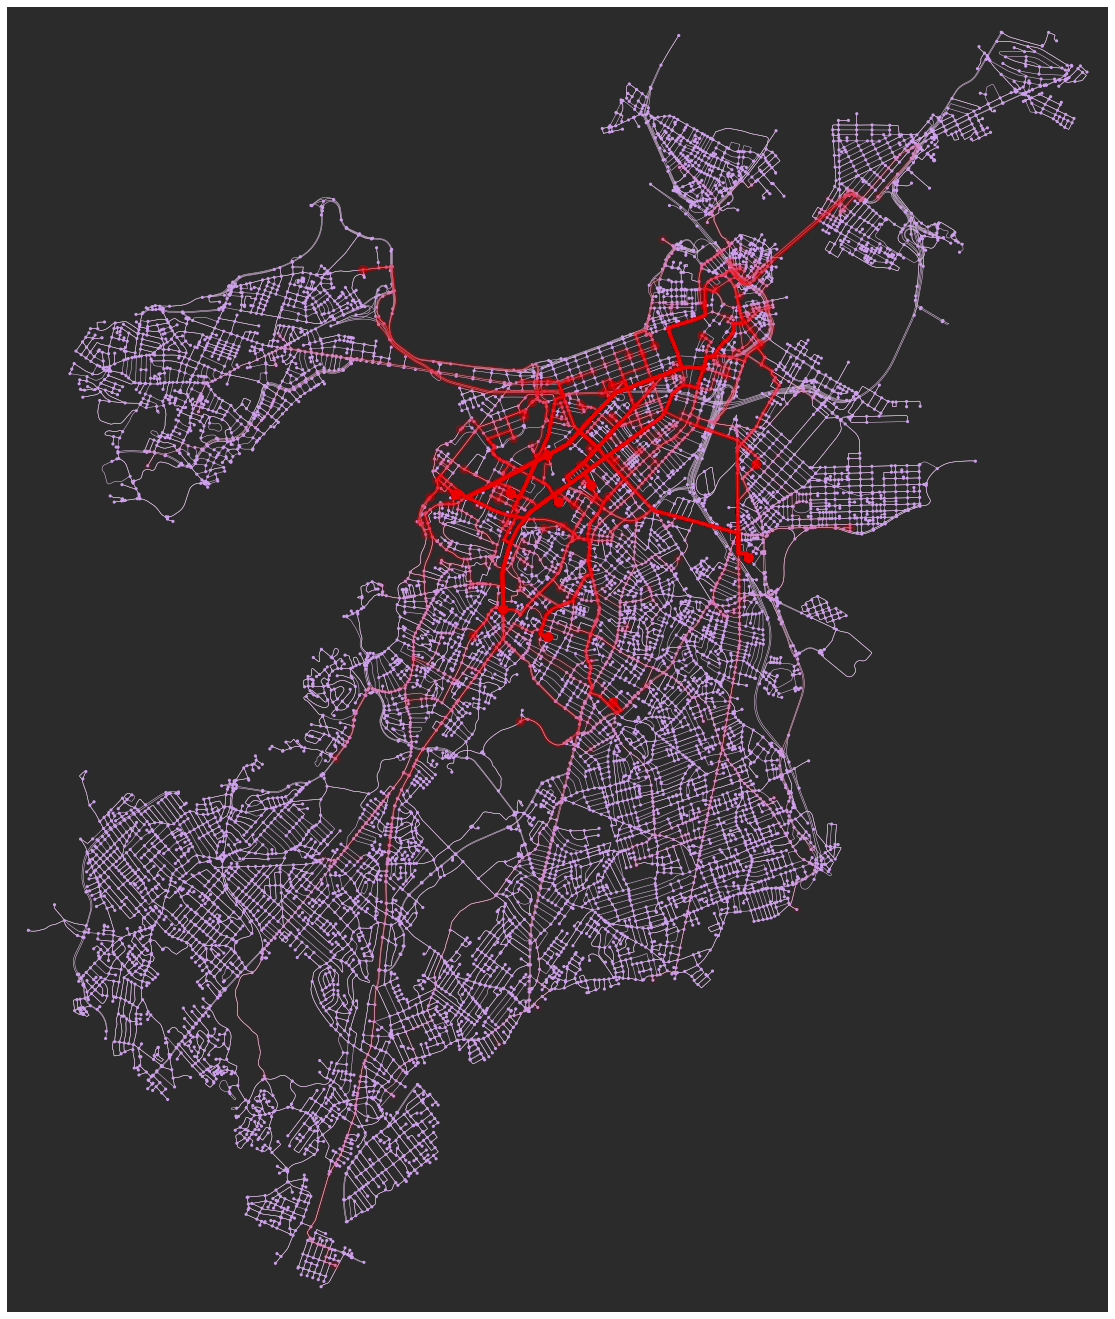

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

In [117]:
ox.plot.plot_graph_routes(G,list(poorTractsW10['routes']),figsize=(24,24), 
                         route_color='#c99649',
                          route_linewidth=4, route_alpha=0.05,node_size=10,
                          edge_linewidth=0.5,bgcolor='#2b2b2b',node_color='#ce9fed',edge_color='#e8c7ed',
                         orig_dest_size=100)

In [118]:
poorTractsW10['weights'].describe()
sum(poorTractsW10['weights'])

20054

# Graph Related Outputs

In [ ]:
ox.plot.plot_graph(G)

In [ ]:
len(routes)

In [ ]:
len(pd.DataFrame(ODs[0:1000])[1].unique())

In [ ]:
#np.savetxt('OD_nodes.txt',ODs,delimiter=',',fmt='%s')

In [ ]:
#np.savetxt('OD_routes.txt',routes,delimiter=',',fmt='%s')

In [ ]:
#import csv
#with open('ROUTES.csv', 'w', newline='') as f:
#    writer = csv.writer(f)
#    writer.writerows(routes)

# DF outputs

In [ ]:
income_Boston.head()

In [ ]:
max_income_tracts.head()

In [ ]:
richTractsW10.head()

In [ ]:
min_income_tracts.head()

In [ ]:
poorTractsW10.head()

In [ ]:
def dfInfo(df):
    print('OD pairs:',df.shape[0])
    print('Total weights:',sum(df['weights']))

In [ ]:
dfInfo(income_Boston)
dfInfo(max_income_tracts)
dfInfo(min_income_tracts)
dfInfo(richTractsW10)
dfInfo(poorTractsW10)

In [ ]:
diff_w10=gpd.overlay(richTractsW10[['route_geometry']], poorTractsW10[['route_geometry']], how='symmetric_difference')

In [ ]:
diff_w10.shape

In [ ]:
diff_w10['geometry'].plot()

In [ ]:
richTractsW10[['tract', 'park',  'weights',
       'neighbour', 'Geographic Area Name', 'Mean income',
       'route_geometry']].to_file('richTracts.shp')


poorTractsW10[['tract', 'park',  'weights',
       'neighbour', 'Geographic Area Name', 'Mean income',
       'route_geometry']].to_file('poorTracts.shp')

In [ ]:
richTractsW10.columns

# Visualization

In [ ]:
sum(income_Boston['weights'][0:1000])

In [ ]:
ox.plot.plot_graph_routes(G,routes[0:1000],figsize=(24,24), 
                         route_color='#c99649',
                          route_linewidth=4, route_alpha=0.05,node_size=10,
                          edge_linewidth=0.5,bgcolor='#2b2b2b',node_color='#ce9fed',edge_color='#e8c7ed',
                         orig_dest_size=100)

# Image Labels

In [ ]:
labels=pd.read_csv('images_latLon.csv')

In [ ]:
labels.head()

In [ ]:
labels.columns=['Unnamed: 0',  'lat','lon']

In [ ]:
labels.head()

In [ ]:
lpoints=gpd.points_from_xy(labels['lon'],labels['lat'])

In [ ]:
labels['geometry']=lpoints

In [ ]:
labels=gpd.GeoDataFrame(labels)

In [ ]:
labels.to_file('images_latlon.shp')

In [ ]:
diff_w10.head()

In [ ]:
diffImage=gpd.overlay(diff_w10,labels[['geometry']],how='intersection')

In [ ]:
diff_w10

# Visualization for reports

In [119]:
Boston_tracts.head()

GEOID10 neighbour                                           geometry  \
9    25021416102     White  MULTIPOLYGON (((-71.13075 42.22796, -71.13074 ...   
68   25021416400     White  POLYGON ((-71.06813 42.27099, -71.06814 42.271...   
90   25021416300     White  MULTIPOLYGON (((-71.09374 42.26708, -71.09374 ...   
91   25021416200     White  POLYGON ((-71.09374 42.26711, -71.09374 42.267...   
102  25021402300     White  POLYGON ((-71.13666 42.23191, -71.13582 42.231...   

                 tract_centroid  
9    POINT (-71.11949 42.23896)  
68   POINT (-71.06809 42.27103)  
90   POINT (-71.08812 42.26832)  
91   POINT (-71.09384 42.26710)  
102  POINT (-71.13350 42.22974)

In [120]:
income.head()

id                              Geographic Area Name  Mean income
0  25025000100     Census Tract 1, Suffolk County, Massachusetts       100193
1  25025000201  Census Tract 2.01, Suffolk County, Massachusetts       106950
2  25025000202  Census Tract 2.02, Suffolk County, Massachusetts       103198
3  25025000301  Census Tract 3.01, Suffolk County, Massachusetts       125179
4  25025000302  Census Tract 3.02, Suffolk County, Massachusetts       117576

In [121]:
iB=Boston_tracts.merge(income,left_on='GEOID10',right_on='id',how='inner')

In [122]:
iB.columns

Index(['GEOID10', 'neighbour', 'geometry', 'tract_centroid', 'id',
       'Geographic Area Name', 'Mean income'],
      dtype='object')

<AxesSubplot:>

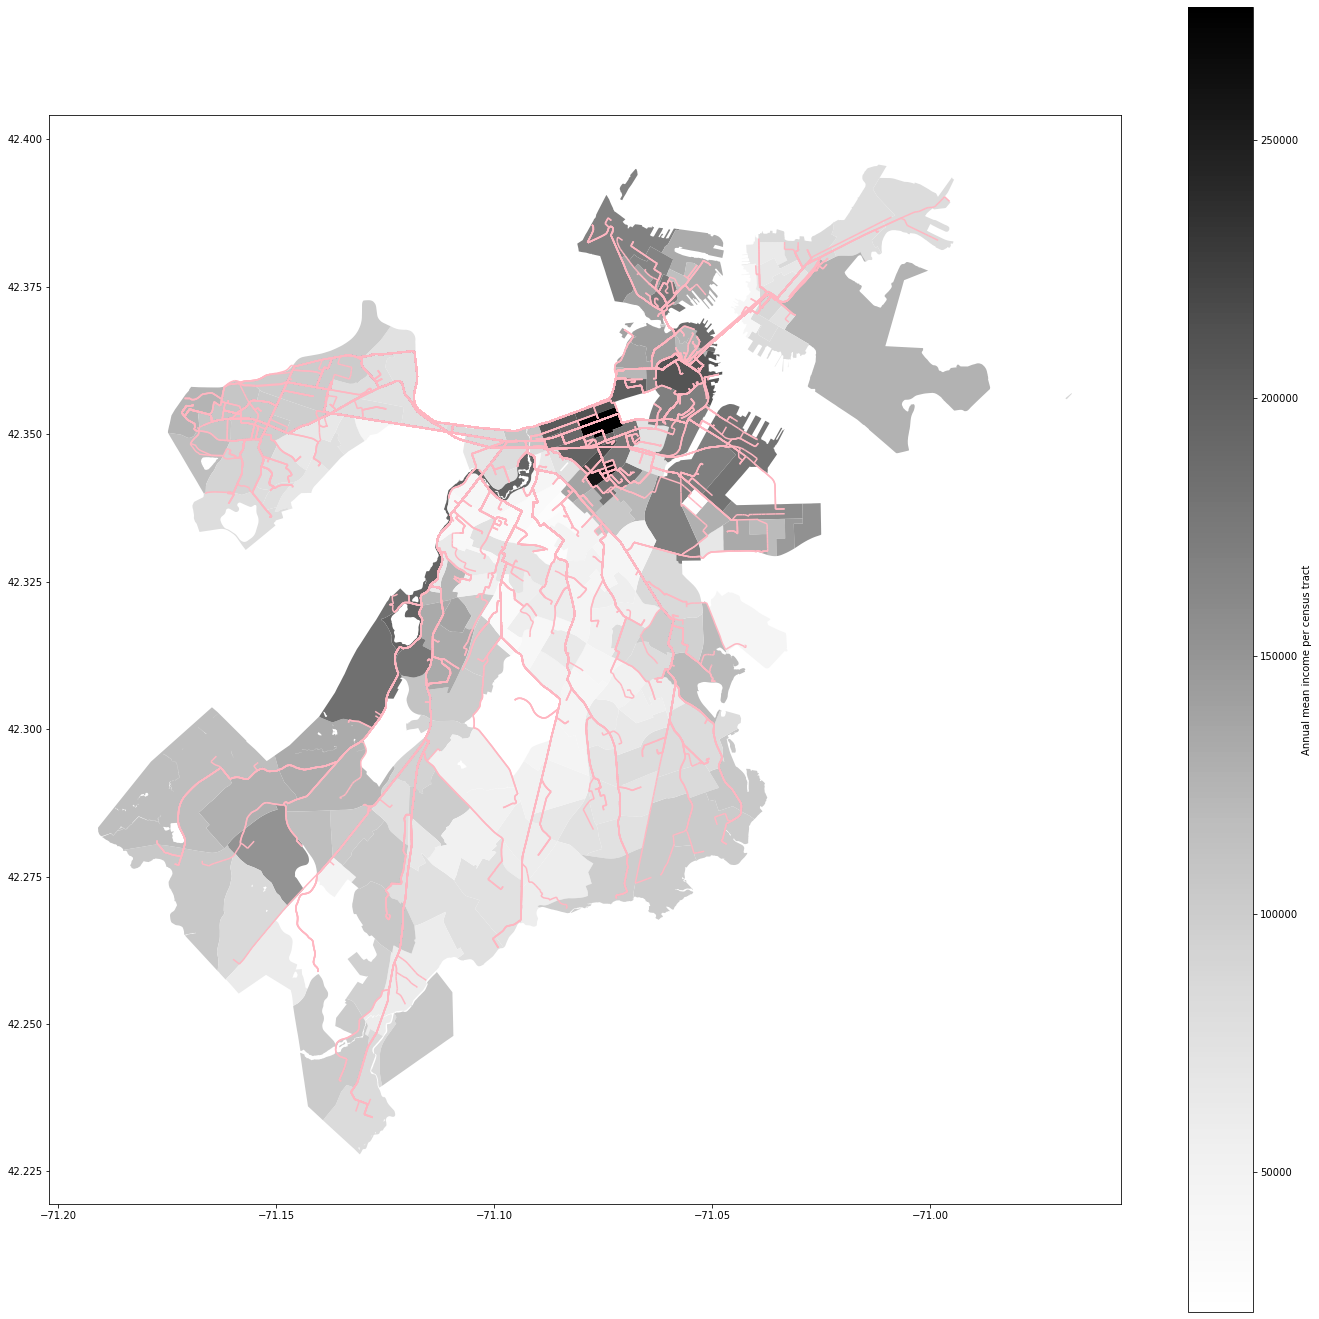

In [175]:
base=iB.plot(column='Mean income', cmap='Greys',figsize=[24,24],legend=True,legend_kwds={'label': "Annual mean income per census tract",
                         'orientation': "vertical"})
income_Boston['route_geometry'][0:1000].plot(ax=base,markersize=0.1,color='#ffb6c1')

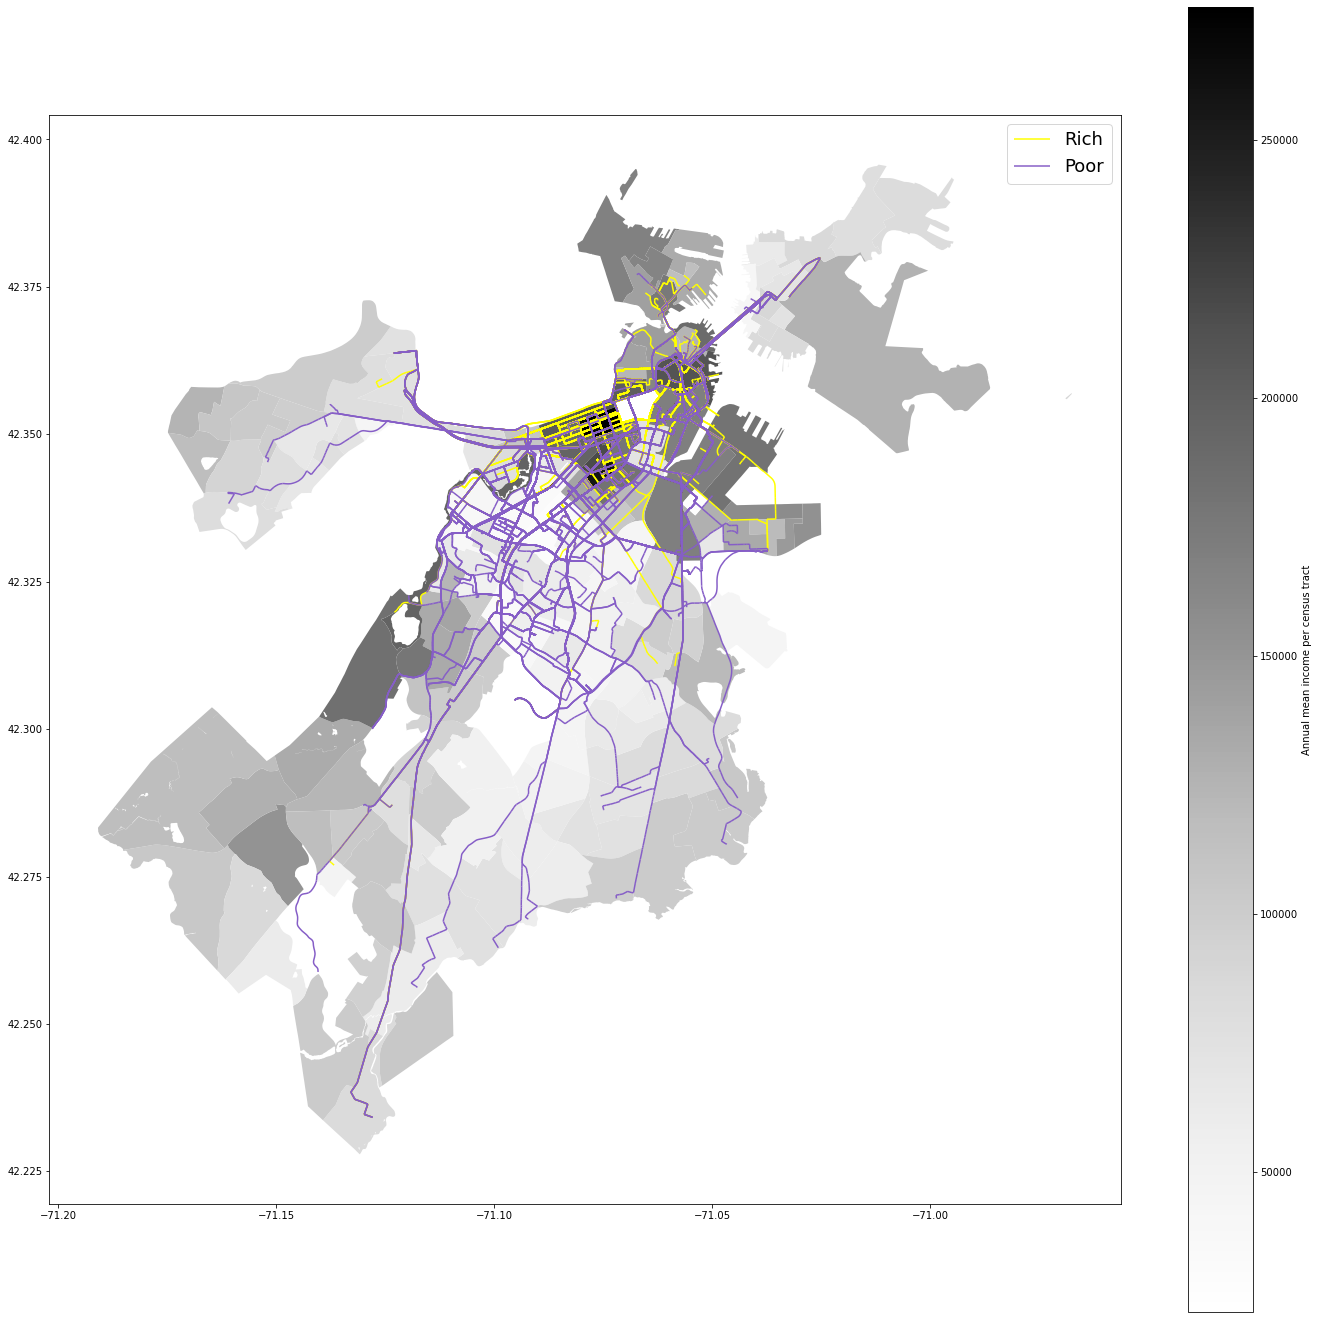

In [171]:
base=iB.plot(column='Mean income', cmap='Greys',figsize=[24,24],legend=True,
             legend_kwds={'label': "Annual mean income per census tract",
                         'orientation': "vertical"})

richTractsW10['route_geometry'].plot(ax=base,markersize=0.1,color='#ffff00',label='Rich')
poorTractsW10['route_geometry'].plot(ax=base,markersize=0.1,color='#865ec7',label='Poor')
plt.legend(fontsize=18)

In [ ]:
iB

In [ ]:
base=iB.plot(column='Mean income', cmap='OrRd',figsize=[24,24])
poorTractsW10['route_geometry'].plot(ax=base,markersize=0.1,color='#ce9fed')

In [149]:
richOnly=gpd.overlay(richTractsW10[['route_geometry']], poorTractsW10[['route_geometry']], how='difference')

In [150]:
poorOnly=gpd.overlay(poorTractsW10[['route_geometry']], richTractsW10[['route_geometry']], how='difference')

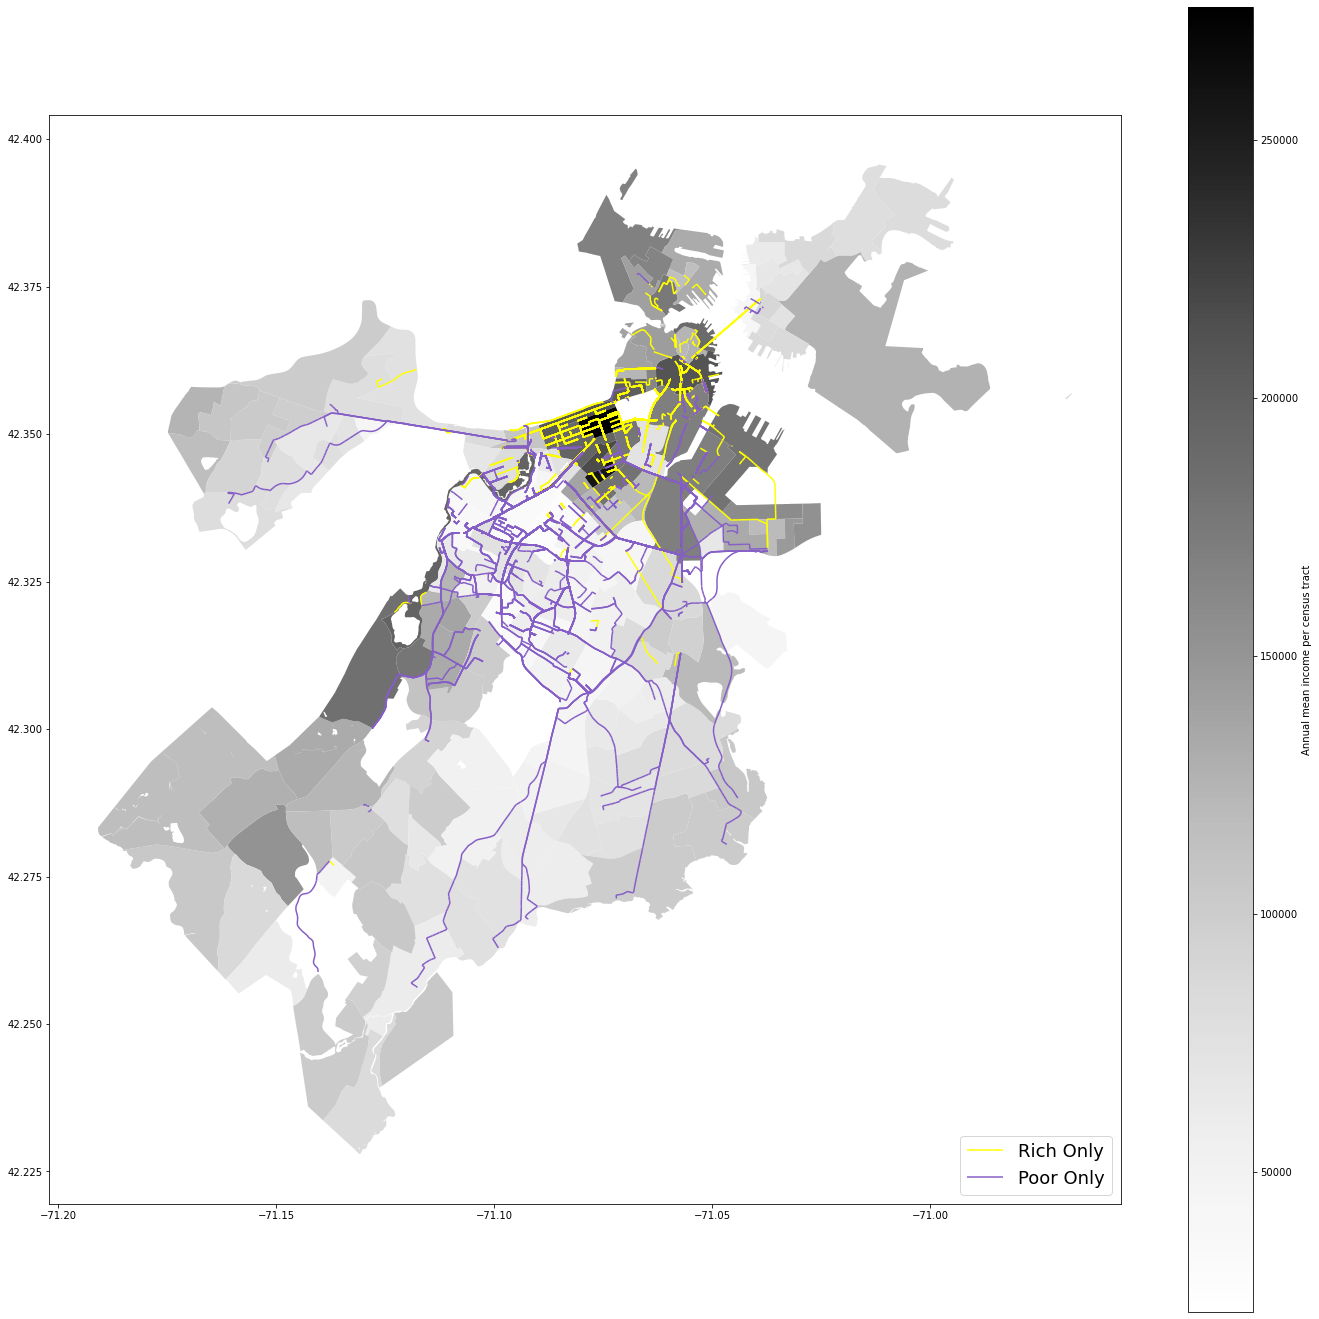

In [173]:
base=iB.plot(column='Mean income', cmap='Greys',figsize=[24,24],legend=True,
             legend_kwds={'label': "Annual mean income per census tract",
                         'orientation': "vertical"})
richOnly['route_geometry'].plot(ax=base,markersize=0.1,color='#ffff00',label='Rich Only')
poorOnly['route_geometry'].plot(ax=base,markersize=0.1,color='#865ec7',label='Poor Only')
plt.legend(fontsize=18,loc='lower right')

##653763 #3c59ea

In [155]:
reproj.head()


tract              tract_centroid       park  \
0  25025000100  POINT (-71.13859 42.36148)  osm_10006   
1  25025000100  POINT (-71.13859 42.36148)  osm_10163   
2  25025000100  POINT (-71.13859 42.36148)  osm_10164   
3  25025000100  POINT (-71.13859 42.36148)  osm_10225   
4  25025000100  POINT (-71.13859 42.36148)  osm_10235   

                park_centroid  weights neighbour           id  \
0  POINT (-71.09818 42.33470)        3     White  25025000100   
1  POINT (-71.12698 42.30325)        1     White  25025000100   
2  POINT (-71.12704 42.30256)        1     White  25025000100   
3  POINT (-71.04911 42.35279)        2     White  25025000100   
4  POINT (-71.08711 42.34110)        1     White  25025000100   

                            Geographic Area Name  Mean income  \
0  Census Tract 1, Suffolk County, Massachusetts       100193   
1  Census Tract 1, Suffolk County, Massachusetts       100193   
2  Census Tract 1, Suffolk County, Massachusetts       100193   
3  Census Tract 1, Suffolk County, Massachusetts       100193   
4  Census Tract 1, Suffolk County, Massachusetts       100193   

                                      route_geometry  
0  MULTILINESTRING ((323859.242 4692114.967, 3238...  
1  MULTILINESTRING ((323859.242 4692114.967, 3238...  
2  MULTILINESTRING ((323859.242 4692114.967, 3238...  
3  MULTILINESTRING ((323859.242 4692114.967, 3238...  
4  MULTILINESTRING ((323859.242 4692114.967, 3238...

In [156]:
reproj.shape

(50327, 10)

In [157]:
p10=reproj[reproj['tract'].isin(lowest['id'])]
r10=reproj[reproj['tract'].isin(highest['id'])]

In [162]:
sum(r10['route_geometry'].length)/1000/sum(r10['weights'])

0.42201213647002767

In [165]:
r10.describe()

weights    Mean income
count  2591.000000    2591.000000
mean     10.156696  218083.024315
std      18.926339   26905.996384
min       1.000000  191480.000000
25%       1.000000  201483.000000
50%       4.000000  210176.000000
75%      11.500000  216902.000000
max     336.000000  275685.000000

In [164]:
sum(p10['route_geometry'].length)/1000/sum(p10['weights'])

0.534396066519231

In [166]:
p10.describe()

weights   Mean income
count  3096.000000   3096.000000
mean      8.851421  33665.735788
std      16.670790   4940.371528
min       1.000000  22833.000000
25%       2.000000  29671.000000
50%       4.000000  34402.000000
75%      10.000000  36780.000000
max     292.000000  41877.000000